dataset: https://www.kaggle.com/blastchar/telco-customer-churn

In [1]:
from google.colab import drive # Import a library named google.colab
drive.mount('/content/drive', force_remount=True) # mount the content to the directory `/content/drive`

%cd /content/drive/MyDrive/Tensorflow_Practice
# !mkdir HW13     # I HAVE MADE IT.

Mounted at /content/drive
/content/drive/MyDrive/Tensorflow_Practice


In [2]:
  import tensorflow as tf
  from tensorflow import keras # a high api 
  import pandas as pd
  import numpy as np
  import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


data exploration

In [4]:
df.drop("customerID", axis="columns", inplace=True) # remove the unuseful information
df.dtypes # see the data type of each columns 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# because MonthlyCharges is type of float64, TotalCharges is type object 
# we have to convert object to float
pd.to_numeric(df.TotalCharges, errors='coerce').isnull() # numeric make the invalid data to Nan

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [6]:
# to get the index of invalid data 
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [7]:
df.iloc[488]["TotalCharges"]

' '

In [8]:
# df1 = df[df.TotalCharges != ' ']
indexes =  df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()].index
print(indexes)
df1 = df.drop(indexes, axis = 'rows')
df1.shape

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')


(7032, 20)

In [9]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
df1.TotalCharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


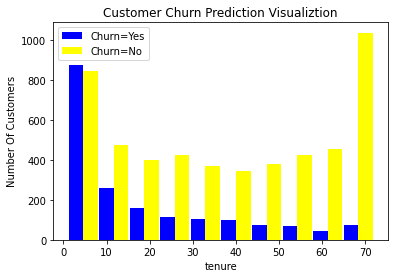

In [11]:
tenure_churn_no = df1[df1.Churn=='No'].tenure 
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")
plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['blue', 'yellow'], label=['Churn=Yes', 'Churn=No'])
plt.legend() # about the label

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


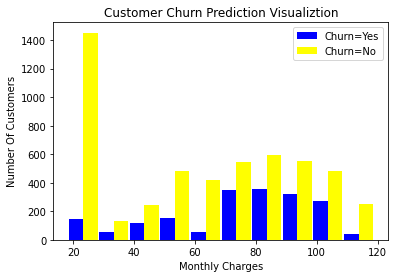

In [12]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95,color=['blue', 'yellow'], label=['Churn=Yes', 'Churn=No'])
plt.legend()

In [13]:
def print_unique_col_values(df):
  for column in df:
    if df[column].dtypes=='object':
      print(f'{column}: {df[column].unique()}')
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [14]:
df1.replace({'No internet service': 'No','No phone service': 'No'},inplace=True)
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
yes_no_collumns = [ "Partner", 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', "PaperlessBilling", "Churn"]

for col in yes_no_collumns:
  df1[col].replace({'Yes' : 1, 'No' : 0}, inplace=True)

In [16]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [17]:
df1["gender"].replace({'Female':0, 'Male':1 }, inplace=True)

In [18]:
df2 = pd.get_dummies(data=df1, columns=["InternetService", "Contract", "PaymentMethod"]) 
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,0,0,0,1,70.70,151.65,1,0,1,0,1,0,0,0,0,1,0


In [19]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [20]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [21]:
for col in df2:
  print(f'{col} : {df2[col].unique() } ' )

gender : [0 1] 
SeniorCitizen : [0 1] 
Partner : [1 0] 
Dependents : [0 1] 
tenure : [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127] 
PhoneService : [0 1] 
MultipleLines : [0 1] 
OnlineSecurity : [0 1] 
OnlineBackup : [1 0] 
DeviceProtection : [

In [22]:
X = df2.drop("Churn", axis='columns')
y = df2.Churn 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [23]:
X_train.shape

(5625, 26)

In [24]:
# input shape equals to the number of  columns
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# tf.keras.optimizers.Adam(
#     learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
#     name='Adam', **kwargs
# )
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 938us/step - loss: 0.5151 - accuracy: 0.7493
Epoch 2/100
176/176 [==============================] - 0s 984us/step - loss: 0.4361 - accuracy: 0.7908
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.7952
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4205 - accuracy: 0.7966
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.8041
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8027
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4128 - accuracy: 0.8080
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.8020
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8064
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4074 - ac

In [25]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 698us/step - loss: 0.5721 - accuracy: 0.7576


[0.5721433162689209, 0.7576403617858887]

In [26]:
yp = model.predict(X_test)
yp

array([[3.4206003e-01],
       [4.0607506e-01],
       [2.2100503e-06],
       ...,
       [6.0551578e-01],
       [5.8543181e-01],
       [7.0254683e-01]], dtype=float32)

In [27]:
y_pred = []
for ele in yp:
  if ele >= 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [28]:
from sklearn.metrics import confusion_matrix, classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       999
           1       0.64      0.38      0.48       408

    accuracy                           0.76      1407
   macro avg       0.71      0.65      0.66      1407
weighted avg       0.74      0.76      0.74      1407



Text(69.0, 0.5, 'Truth')

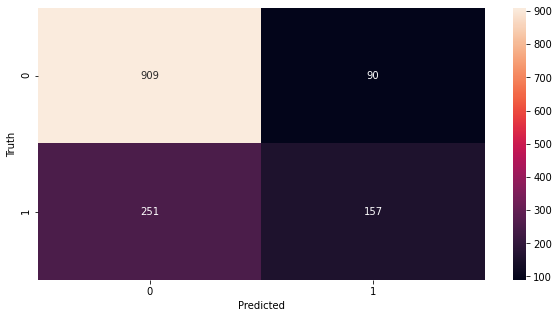

In [29]:
import seaborn as sn 
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
# plt.figure
plt.figure(figsize = (10,5))

sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [30]:
print("The number of classification report")
# Accuracy
print(round((821+237)/(821+178+171+237), 2))
# Precision for 0 class 
print(round(821/(821+171), 2))
# Precision for 1 class 
print(round(229/(229+137), 2))
# Recall fo 0 class 
print(round(821/(821+178), 2))
# Recall for 1 class 
print(round(237/(171+237), 2))


The number of classification report
0.75
0.83
0.63
0.82
0.58


# handle imbalanced dataset

In [39]:
def ANN(X_train, y_train, X_test, y_test, loss, weights):
    # input shape equals to the number of  columns
    model = keras.Sequential([
        keras.layers.Dense(26, input_shape=(26,), activation='relu'),
        keras.layers.Dense(20, activation='relu'),
        keras.layers.Dense(15, activation='relu'),
        keras.layers.Dense(1, activation='sigmoid')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
    if weights == -1:
      model.fit(X_train, y_train, epochs=100)
    else:
      model.fit(X_train, y_train, epochs=100, class_weight=weights)

    print(model.evaluate(X_test, y_test))

    y_preds = model.predict(X_test)
    y_preds = np.round(y_preds)

    print("Classification Report: \n", classification_report(y_test, y_preds))

    return y_preds



# Method 1: Undersampling

In [40]:
count_class_0, count_class_1 = df1.Churn.value_counts()
df_class_0 = df2[df2['Churn'] == 0]
df_class_1 = df2[df2['Churn'] == 1]

In [41]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_undersampling = pd.concat([df_class_0_under, df_class_1], axis=0)
X = df_test_undersampling.drop('Churn',axis='columns')
y = df_test_undersampling['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)

In [43]:
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

94/94 [==============================] - 0s 1ms/step - loss: 0.3368 - accuracy: 0.8478
Epoch 87/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3371 - accuracy: 0.8492
Epoch 88/100
94/94 [==============================] - 0s 975us/step - loss: 0.3343 - accuracy: 0.8458
Epoch 89/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3311 - accuracy: 0.8508
Epoch 90/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3326 - accuracy: 0.8502
Epoch 91/100
94/94 [==============================] - 0s 977us/step - loss: 0.3316 - accuracy: 0.8515
Epoch 92/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3293 - accuracy: 0.8468
Epoch 93/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3292 - accuracy: 0.8542
Epoch 94/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3268 - accuracy: 0.8532
Epoch 95/100
94/94 [==============================] - 0s 1ms/step - loss: 0.3272 - accuracy: 0.8512
Epoch 96/

# Method2 : Oversampling

In [45]:
df_class_1_oversampling = df_class_1.sample(count_class_0, replace=True)
df_test_oversampling = pd.concat([df_class_0, df_class_1_oversampling], axis='rows')
X = df_test_oversampling.drop('Churn',axis='columns')
y = df_test_oversampling['Churn']

from sklearn.model_selection import train_test_split
# stratify is for imbalanced datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

259/259 [==============================] - 0s 1ms/step - loss: 0.3218 - accuracy: 0.8577
Epoch 96/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.8613
Epoch 97/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3206 - accuracy: 0.8590
Epoch 98/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3197 - accuracy: 0.8568
Epoch 99/100
259/259 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8575
Epoch 100/100
65/65 [==============================] - 0s 689us/step - loss: 0.4653 - accuracy: 0.8069
[0.46528467535972595, 0.8068732023239136]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.75      0.79      1033
           1       0.77      0.87      0.82      1033

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



# Method3: Oversampling_SMOTE

In [51]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)
y_preds = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)


Classification Report: 
               precision    recall  f1-score   support

           0       0.82      0.73      0.77      1033
           1       0.76      0.84      0.80      1033

    accuracy                           0.78      2066
   macro avg       0.79      0.78      0.78      2066
weighted avg       0.79      0.78      0.78      2066



# Method4: Use of Ensemble with undersampling

In [57]:
df2.Churn.value_counts()
X = df2.drop('Churn',axis='columns')
y = df2['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)


In [58]:
df3 = X_train.copy()
df3['Churn'] = y_train
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [59]:
def get_train_batch(df_majority, df_minority, start, end):
    df_train = pd.concat([df_majority[start:end], df_minority], axis=0)

    X_train = df_train.drop('Churn', axis='columns')
    y_train = df_train.Churn
    return X_train, y_train

In [60]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)
y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)
y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)
y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 0s 1ms/step - loss: 0.6350 - accuracy: 0.6472
Epoch 2/100
94/94 [==============================] - 0s 965us/step - loss: 0.5224 - accuracy: 0.7452
Epoch 3/100
94/94 [==============================] - 0s 979us/step - loss: 0.4965 - accuracy: 0.7609
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.7682
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4841 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4812 - accuracy: 0.7716
Epoch 7/100
94/94 [==============================] - 0s 980us/step - loss: 0.4765 - accuracy: 0.7803
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4728 - accuracy: 0.7806
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4722 - accuracy: 0.7756
Epoch 10/100
94/94 [==============================] - 0s 984us/step - loss: 0.4674 - accuracy: 0.7813
E

In [65]:
y_pred_final = y_pred1.copy()
for i in range(len(y_pred1)):
    n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
    if n_ones > 1.:
        y_pred_final[i] = 1
    else:
        y_pred_final[i] = 0

cl_rep = classification_report(y_test, y_pred_final)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.88      0.69      0.77      1033
           1       0.46      0.73      0.57       374

    accuracy                           0.70      1407
   macro avg       0.67      0.71      0.67      1407
weighted avg       0.77      0.70      0.72      1407

